# Hourly Cab Booking Prediction Analysis

Assignment : To predict the total count of cabs booked in each hour using ML.

Data points: datetime, season, holiday, workingday, weather, temp, humidity, windspeed, Total_booking. 
Output/Dependent variables:  Total_booking.

In [1]:
# Installing required libraries

In [2]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Importing libraries
import numpy as np
import pandas as pd
import pandas_profiling as pf

#Required imports
import time, datetime

#Visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# preprocessing
from sklearn.preprocessing import LabelEncoder

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neural_network import MLPRegressor

In [6]:
#Loading dataset
data = pd.read_csv("Final_data_Updated_data.csv", header=0)
data.head()

datetime  season  holiday  workingday              weather   temp  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds   28.7   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34   

   humidity  windspeed  total number of bookings  
0        77    16.9979                       504  
1        79    19.0012                         5  
2        50    22.0028                       139  
3        29     8.9981                       209  
4        51    19.0012                       184

In [7]:
#Creating an original copy of the data for backup
data_backup = data.copy()
data_backup.head()

datetime  season  holiday  workingday              weather   temp  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds   28.7   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34   

   humidity  windspeed  total number of bookings  
0        77    16.9979                       504  
1        79    19.0012                         5  
2        50    22.0028                       139  
3        29     8.9981                       209  
4        51    19.0012                       184

# Task 1: Data Analysis

In [8]:
# Creating Profile Report of the Dataset - Missing values, Outlier, Correlation can be easily interpreted

In [9]:
#Generating the Profile Report of the dataset - Easiest way to get the insights of the Data
import pandas_profiling as pf
profile = pf.ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#Get the Descriptive Stats about the Numeric data along with the categorical feature
data.describe(include='all')

datetime  season      holiday   workingday  \
count              8708    8708  8708.000000  8708.000000   
unique             8708       7          NaN          NaN   
top     7/12/2011 21:00  Summer          NaN          NaN   
freq                  1    2191          NaN          NaN   
mean                NaN     NaN     0.028480     0.680294   
std                 NaN     NaN     0.166348     0.466389   
min                 NaN     NaN     0.000000     0.000000   
25%                 NaN     NaN     0.000000     0.000000   
50%                 NaN     NaN     0.000000     1.000000   
75%                 NaN     NaN     0.000000     1.000000   
max                 NaN     NaN     1.000000     1.000000   

                    weather   temp     humidity    windspeed  \
count                  8708   8705  8708.000000  8708.000000   
unique                    4     55          NaN          NaN   
top      Clear + Few clouds  14.76          NaN          NaN   
freq                   5753    361          NaN          NaN   
mean                    NaN    NaN    61.649173    12.843891   
std                     NaN    NaN    19.199578     8.190314   
min                     NaN    NaN     0.000000     0.000000   
25%                     NaN    NaN    46.000000     7.001500   
50%                     NaN    NaN    61.000000    12.998000   
75%                     NaN    NaN    77.000000    16.997900   
max                     NaN    NaN   100.000000    56.996900   

        total number of bookings  
count                8708.000000  
unique                       NaN  
top                          NaN  
freq                         NaN  
mean                  193.007005  
std                   181.552211  
min                     1.000000  
25%                    43.000000  
50%                   148.000000  
75%                   286.000000  
max                   977.000000

In [11]:
#Info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  8708 non-null   object 
 1   season                    8708 non-null   object 
 2   holiday                   8708 non-null   int64  
 3   workingday                8708 non-null   int64  
 4   weather                   8708 non-null   object 
 5   temp                      8705 non-null   object 
 6   humidity                  8708 non-null   int64  
 7   windspeed                 8708 non-null   float64
 8   total number of bookings  8708 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 612.4+ KB


In [12]:
#Get data types
data.dtypes

datetime                     object
season                       object
holiday                       int64
workingday                    int64
weather                      object
temp                         object
humidity                      int64
windspeed                   float64
total number of bookings      int64
dtype: object

In [13]:
#Converting object to float for temp column
data['temp'] = pd.to_numeric(data['temp'],errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  8708 non-null   object 
 1   season                    8708 non-null   object 
 2   holiday                   8708 non-null   int64  
 3   workingday                8708 non-null   int64  
 4   weather                   8708 non-null   object 
 5   temp                      8701 non-null   float64
 6   humidity                  8708 non-null   int64  
 7   windspeed                 8708 non-null   float64
 8   total number of bookings  8708 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 612.4+ KB


In [14]:
# Identifying Missing Values

In [15]:
#Checking missing values
data.isnull().sum()

datetime                    0
season                      0
holiday                     0
workingday                  0
weather                     0
temp                        7
humidity                    0
windspeed                   0
total number of bookings    0
dtype: int64

In [16]:
# By looking at the info, we can say that there are 7 missing values for temp column

In [17]:
#looking at the missing values of the Temp column
data[data.temp.isnull()]

datetime  season  holiday  workingday                  weather  \
60   7/16/2011 18:00    Fall        0           0       Clear + Few clouds   
172  12/9/2012 17:00  Winter        0           0   Light Snow, Light Rain   
269  11/19/2011 5:00  Winter        0           0       Clear + Few clouds   
339   9/1/2011 15:00    Fall        0           1       Clear + Few clouds   
406   8/7/2011 12:00    Fall        0           0       Clear + Few clouds   
561   1/1/2012 16:00  Spring        0           0           Mist + Cloudy    
644    4/7/2011 2:00  Summer        0           1       Clear + Few clouds   

     temp  humidity  windspeed  total number of bookings  
60    NaN        45    19.0012                       428  
172   NaN        93     8.9981                       229  
269   NaN        56    16.9979                         2  
339   NaN        51     8.9981                       174  
406   NaN        42    19.9995                       370  
561   NaN        54    19.9995                       215  
644   NaN        54     0.0000                         7

In [18]:
#Calculating Median for temp column and filling it
med = data.temp.median()
med

20.5

In [19]:
# Imputing Median
data['temp_median']= data.temp.fillna(med)
data.head()

datetime  season  holiday  workingday              weather   temp  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34   

   humidity  windspeed  total number of bookings  temp_median  
0        77    16.9979                       504        22.14  
1        79    19.0012                         5        28.70  
2        50    22.0028                       139         5.74  
3        29     8.9981                       209        13.94  
4        51    19.0012                       184        30.34

In [20]:
#looking at the missing values of the Temp column with imputed temp_median column
data[data.temp.isnull()]

datetime  season  holiday  workingday                  weather  \
60   7/16/2011 18:00    Fall        0           0       Clear + Few clouds   
172  12/9/2012 17:00  Winter        0           0   Light Snow, Light Rain   
269  11/19/2011 5:00  Winter        0           0       Clear + Few clouds   
339   9/1/2011 15:00    Fall        0           1       Clear + Few clouds   
406   8/7/2011 12:00    Fall        0           0       Clear + Few clouds   
561   1/1/2012 16:00  Spring        0           0           Mist + Cloudy    
644    4/7/2011 2:00  Summer        0           1       Clear + Few clouds   

     temp  humidity  windspeed  total number of bookings  temp_median  
60    NaN        45    19.0012                       428         20.5  
172   NaN        93     8.9981                       229         20.5  
269   NaN        56    16.9979                         2         20.5  
339   NaN        51     8.9981                       174         20.5  
406   NaN        42    19.9995                       370         20.5  
561   NaN        54    19.9995                       215         20.5  
644   NaN        54     0.0000                         7         20.5

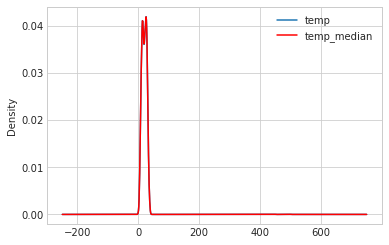

In [21]:
#Building KDE distributions to check about the distributions after imputing the missing values
fig = plt.figure()
ax = fig.add_subplot(111)
data['temp'].plot(kind='kde', ax=ax)
data.temp_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [22]:
# As both the graphs are inseparable, we can say that the data has been imputed properly

In [23]:
#Dropping the temp column
data.drop('temp', inplace=True, axis=1)
data.head()

datetime  season  holiday  workingday              weather  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds   

   humidity  windspeed  total number of bookings  temp_median  
0        77    16.9979                       504        22.14  
1        79    19.0012                         5        28.70  
2        50    22.0028                       139         5.74  
3        29     8.9981                       209        13.94  
4        51    19.0012                       184        30.34

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  8708 non-null   object 
 1   season                    8708 non-null   object 
 2   holiday                   8708 non-null   int64  
 3   workingday                8708 non-null   int64  
 4   weather                   8708 non-null   object 
 5   humidity                  8708 non-null   int64  
 6   windspeed                 8708 non-null   float64
 7   total number of bookings  8708 non-null   int64  
 8   temp_median               8708 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 612.4+ KB


In [25]:
data.describe(include='all')

datetime  season      holiday   workingday  \
count              8708    8708  8708.000000  8708.000000   
unique             8708       7          NaN          NaN   
top     7/12/2011 21:00  Summer          NaN          NaN   
freq                  1    2191          NaN          NaN   
mean                NaN     NaN     0.028480     0.680294   
std                 NaN     NaN     0.166348     0.466389   
min                 NaN     NaN     0.000000     0.000000   
25%                 NaN     NaN     0.000000     0.000000   
50%                 NaN     NaN     0.000000     1.000000   
75%                 NaN     NaN     0.000000     1.000000   
max                 NaN     NaN     1.000000     1.000000   

                    weather     humidity    windspeed  \
count                  8708  8708.000000  8708.000000   
unique                    4          NaN          NaN   
top      Clear + Few clouds          NaN          NaN   
freq                   5753          NaN          NaN   
mean                    NaN    61.649173    12.843891   
std                     NaN    19.199578     8.190314   
min                     NaN     0.000000     0.000000   
25%                     NaN    46.000000     7.001500   
50%                     NaN    61.000000    12.998000   
75%                     NaN    77.000000    16.997900   
max                     NaN   100.000000    56.996900   

        total number of bookings  temp_median  
count                8708.000000  8708.000000  
unique                       NaN          NaN  
top                          NaN          NaN  
freq                         NaN          NaN  
mean                  193.007005    20.344962  
std                   181.552211    10.421636  
min                     1.000000     0.820000  
25%                    43.000000    13.940000  
50%                   148.000000    20.500000  
75%                   286.000000    26.240000  
max                   977.000000   500.030000

In [26]:
#As datetime is an object time, coverting it into multiple columns
data['datetime'] = pd.to_datetime(data['datetime'])
data['date'] = data['datetime'].dt.date
data['time'] = data['datetime'].dt.time
data.head()

datetime  season  holiday  workingday              weather  \
0 2012-05-02 19:00:00  Summer        0           1   Clear + Few clouds   
1 2012-09-05 04:00:00    Fall        0           1   Clear + Few clouds   
2 2011-01-13 09:00:00  Spring        0           1   Clear + Few clouds   
3 2011-11-18 16:00:00  Winter        0           1   Clear + Few clouds   
4 2011-09-13 13:00:00    Fall        0           1   Clear + Few clouds   

   humidity  windspeed  total number of bookings  temp_median        date  \
0        77    16.9979                       504        22.14  2012-05-02   
1        79    19.0012                         5        28.70  2012-09-05   
2        50    22.0028                       139         5.74  2011-01-13   
3        29     8.9981                       209        13.94  2011-11-18   
4        51    19.0012                       184        30.34  2011-09-13   

       time  
0  19:00:00  
1  04:00:00  
2  09:00:00  
3  16:00:00  
4  13:00:00

In [27]:
#Dropping Datetime column
data.drop('datetime', inplace=True, axis=1)
data.head()

season  holiday  workingday              weather  humidity  windspeed  \
0  Summer        0           1   Clear + Few clouds        77    16.9979   
1    Fall        0           1   Clear + Few clouds        79    19.0012   
2  Spring        0           1   Clear + Few clouds        50    22.0028   
3  Winter        0           1   Clear + Few clouds        29     8.9981   
4    Fall        0           1   Clear + Few clouds        51    19.0012   

   total number of bookings  temp_median        date      time  
0                       504        22.14  2012-05-02  19:00:00  
1                         5        28.70  2012-09-05  04:00:00  
2                       139         5.74  2011-01-13  09:00:00  
3                       209        13.94  2011-11-18  16:00:00  
4                       184        30.34  2011-09-13  13:00:00

In [28]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'humidity', 'windspeed',
       'total number of bookings', 'temp_median', 'date', 'time'],
      dtype='object')

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='season', ylabel='count'>

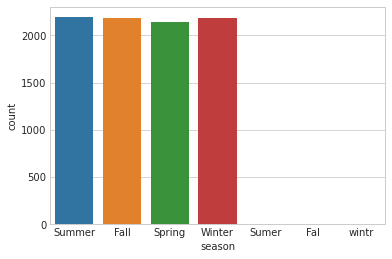

In [29]:
# Visualizing Season column
sns.countplot(data.season)

In [30]:
#Going through the season column data
data.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter', 'Sumer', 'Fal', 'wintr'],
      dtype=object)

In [31]:
# As there are some data which have corrupted names, replacing them with the correct names
data = data.replace(to_replace ="Sumer",value ="Summer")
data = data.replace(to_replace ="Fal",value ="Fall")
data = data.replace(to_replace ="wintr",value ="Winter")
# Season column
data.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='season', ylabel='count'>

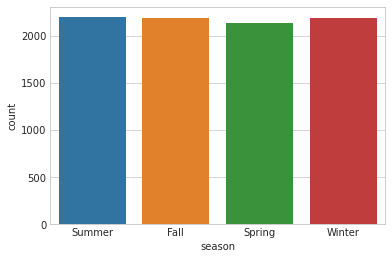

In [32]:
# Visualizing Season column
sns.countplot(data.season)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='holiday', ylabel='count'>

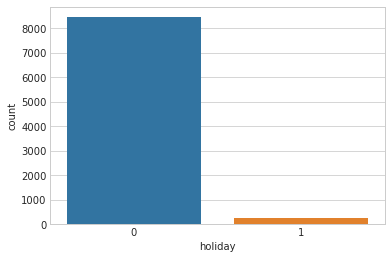

In [33]:
sns.countplot(data.holiday)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='workingday', ylabel='count'>

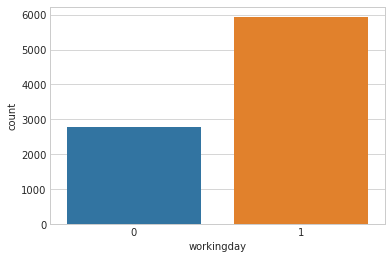

In [34]:
sns.countplot(data.workingday)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='weather', ylabel='count'>

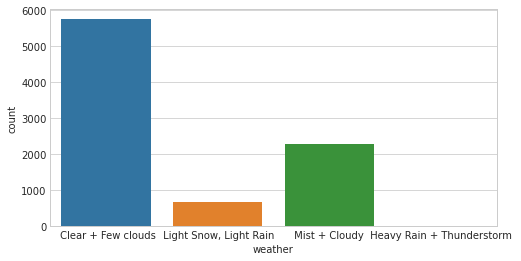

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(data.weather)

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='humidity', ylabel='count'>

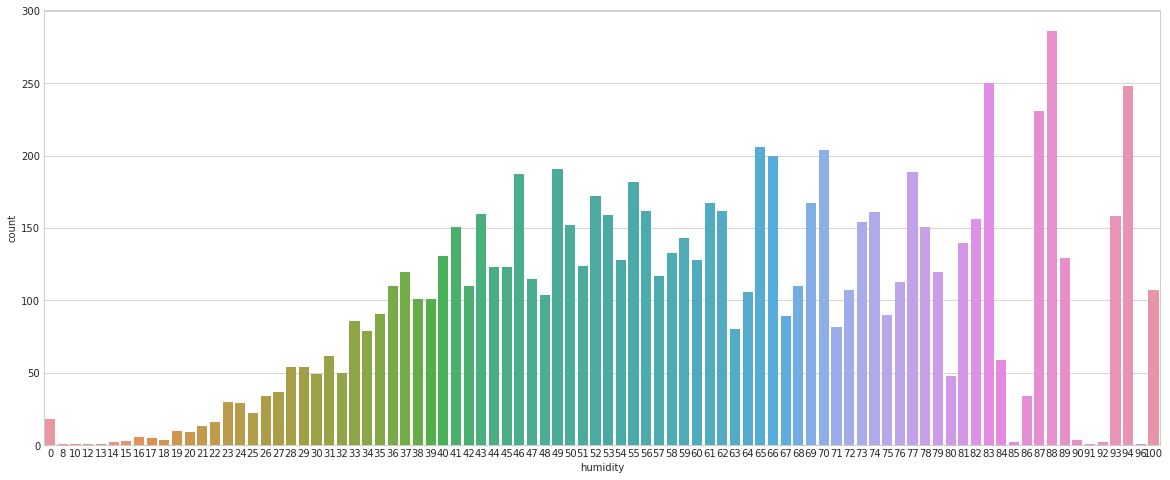

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(data.humidity)

In [37]:
#For Target variable
plt.figure(figsize=(12,6))
sns.distplot(data['total number of bookings'])

/srv/conda/envs/notebook/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total number of bookings', ylabel='Density'>

In [38]:
data.describe(include="all")

season      holiday   workingday              weather     humidity  \
count     8708  8708.000000  8708.000000                 8708  8708.000000   
unique       4          NaN          NaN                    4          NaN   
top     Summer          NaN          NaN   Clear + Few clouds          NaN   
freq      2197          NaN          NaN                 5753          NaN   
mean       NaN     0.028480     0.680294                  NaN    61.649173   
std        NaN     0.166348     0.466389                  NaN    19.199578   
min        NaN     0.000000     0.000000                  NaN     0.000000   
25%        NaN     0.000000     0.000000                  NaN    46.000000   
50%        NaN     0.000000     1.000000                  NaN    61.000000   
75%        NaN     0.000000     1.000000                  NaN    77.000000   
max        NaN     1.000000     1.000000                  NaN   100.000000   

          windspeed  total number of bookings  temp_median        date  \
count   8708.000000               8708.000000  8708.000000        8708   
unique          NaN                       NaN          NaN         456   
top             NaN                       NaN          NaN  2011-08-09   
freq            NaN                       NaN          NaN          24   
mean      12.843891                193.007005    20.344962         NaN   
std        8.190314                181.552211    10.421636         NaN   
min        0.000000                  1.000000     0.820000         NaN   
25%        7.001500                 43.000000    13.940000         NaN   
50%       12.998000                148.000000    20.500000         NaN   
75%       16.997900                286.000000    26.240000         NaN   
max       56.996900                977.000000   500.030000         NaN   

            time  
count       8708  
unique        24  
top     10:00:00  
freq         384  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

In [39]:
# Outlier Analysis 
# As the maximum values is very much higher than the min, 0%, 25%, 50%, 75% of the data. This column will have outliers.
sns.boxplot(x=data['windspeed'])

<AxesSubplot:xlabel='windspeed'>

In [40]:
data.windspeed.value_counts()

0.0000     1056
8.9981      886
11.0014     853
7.0015      827
12.9980     824
15.0013     764
6.0032      682
16.9979     656
19.0012     549
19.9995     393
22.0028     298
23.9994     220
26.0027     190
27.9993     156
30.0026      97
31.0009      75
32.9975      70
35.0008      45
39.0007      22
36.9974      19
43.9989       7
43.0006       6
40.9973       5
46.0022       3
47.9988       2
50.0021       1
56.9969       1
51.9987       1
Name: windspeed, dtype: int64

In [41]:
# Median value
median_windspeed = data['windspeed'].quantile(0.50)
median_windspeed

12.998

In [42]:
upper_lim_wind = data['windspeed'].quantile(0.95)
upper_lim_wind

27.9993

In [43]:
data['windspeed'] = np.where(data['windspeed'] > upper_lim_wind,median_windspeed, data['windspeed'])
data.describe()

holiday   workingday     humidity    windspeed  \
count  8708.000000  8708.000000  8708.000000  8708.000000   
mean      0.028480     0.680294    61.649173    12.012031   
std       0.166348     0.466389    19.199578     6.955756   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000    46.000000     7.001500   
50%       0.000000     1.000000    61.000000    12.998000   
75%       0.000000     1.000000    77.000000    16.997900   
max       1.000000     1.000000   100.000000    27.999300   

       total number of bookings  temp_median  
count               8708.000000  8708.000000  
mean                 193.007005    20.344962  
std                  181.552211    10.421636  
min                    1.000000     0.820000  
25%                   43.000000    13.940000  
50%                  148.000000    20.500000  
75%                  286.000000    26.240000  
max                  977.000000   500.030000

In [44]:
sns.boxplot(x=data['windspeed'])

<AxesSubplot:xlabel='windspeed'>

In [45]:
# Outlier Analysis 
# As the maximum values is very much higher than the min, 0%, 25%, 50%, 75% of the data. This column will have outliers.
sns.boxplot(x=data['temp_median'])

<AxesSubplot:xlabel='temp_median'>

In [46]:
data.temp_median.value_counts()

14.76     361
26.24     355
28.70     338
27.06     331
25.42     327
13.94     324
12.30     324
22.96     319
18.86     317
16.40     315
22.14     315
24.60     307
21.32     294
13.12     291
29.52     287
17.22     274
10.66     273
20.50     273
18.04     258
30.34     240
9.84      232
15.58     208
9.02      201
31.16     190
8.20      185
27.88     178
32.80     169
23.78     162
11.48     142
19.68     129
6.56      112
33.62     103
7.38       87
31.98      81
5.74       81
34.44      63
35.26      60
4.92       48
36.90      38
4.10       36
37.72      26
36.08      16
3.28        9
0.82        7
39.36       6
38.54       6
2.46        5
1.64        2
500.03      1
41.00       1
450.00      1
Name: temp_median, dtype: int64

In [47]:
# Median value
median_temp = data['temp_median'].quantile(0.50)
median_temp

20.5

In [48]:
upper_lim_temp = data['temp_median'].quantile(0.95)
upper_lim_temp

32.8

In [49]:
data['temp_median'] = np.where(data['temp_median'] > upper_lim_wind,median_windspeed, data['temp_median'])
data.describe()

holiday   workingday     humidity    windspeed  \
count  8708.000000  8708.000000  8708.000000  8708.000000   
mean      0.028480     0.680294    61.649173    12.012031   
std       0.166348     0.466389    19.199578     6.955756   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000    46.000000     7.001500   
50%       0.000000     1.000000    61.000000    12.998000   
75%       0.000000     1.000000    77.000000    16.997900   
max       1.000000     1.000000   100.000000    27.999300   

       total number of bookings  temp_median  
count               8708.000000  8708.000000  
mean                 193.007005    16.837787  
std                  181.552211     5.963680  
min                    1.000000     0.820000  
25%                   43.000000    12.998000  
50%                  148.000000    15.580000  
75%                  286.000000    22.140000  
max                  977.000000    27.880000

<AxesSubplot:xlabel='temp_median'>

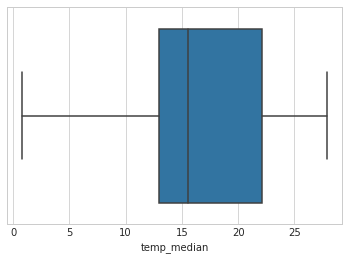

In [50]:
sns.boxplot(x=data['temp_median'])

<AxesSubplot:xlabel='total number of bookings'>

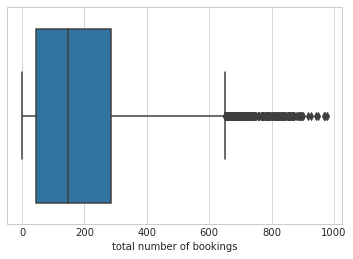

In [51]:
# As the maximum values is very much higher than the min, 0%, 25%, 50%, 75% of the data. This column will have outliers.
sns.boxplot(x=data['total number of bookings'])

In [52]:
data['total number of bookings'].value_counts()

5      129
4      121
3      116
6      113
2      103
      ... 
844      1
852      1
868      1
892      1
943      1
Name: total number of bookings, Length: 797, dtype: int64

In [53]:
sns.scatterplot(x=data.season, y=data.windspeed)

<AxesSubplot:xlabel='season', ylabel='windspeed'>

In [54]:
sns.scatterplot(x=data.season, y=data.temp_median)

<AxesSubplot:xlabel='season', ylabel='temp_median'>

In [55]:
# By visualizing the above graph, we can say that the Windspeed variation does not result as outliers.

In [56]:
data.describe(include='all')

season      holiday   workingday              weather     humidity  \
count     8708  8708.000000  8708.000000                 8708  8708.000000   
unique       4          NaN          NaN                    4          NaN   
top     Summer          NaN          NaN   Clear + Few clouds          NaN   
freq      2197          NaN          NaN                 5753          NaN   
mean       NaN     0.028480     0.680294                  NaN    61.649173   
std        NaN     0.166348     0.466389                  NaN    19.199578   
min        NaN     0.000000     0.000000                  NaN     0.000000   
25%        NaN     0.000000     0.000000                  NaN    46.000000   
50%        NaN     0.000000     1.000000                  NaN    61.000000   
75%        NaN     0.000000     1.000000                  NaN    77.000000   
max        NaN     1.000000     1.000000                  NaN   100.000000   

          windspeed  total number of bookings  temp_median        date  \
count   8708.000000               8708.000000  8708.000000        8708   
unique          NaN                       NaN          NaN         456   
top             NaN                       NaN          NaN  2011-08-09   
freq            NaN                       NaN          NaN          24   
mean      12.012031                193.007005    16.837787         NaN   
std        6.955756                181.552211     5.963680         NaN   
min        0.000000                  1.000000     0.820000         NaN   
25%        7.001500                 43.000000    12.998000         NaN   
50%       12.998000                148.000000    15.580000         NaN   
75%       16.997900                286.000000    22.140000         NaN   
max       27.999300                977.000000    27.880000         NaN   

            time  
count       8708  
unique        24  
top     10:00:00  
freq         384  
mean         NaN  
std          NaN  
min          NaN  
25%          NaN  
50%          NaN  
75%          NaN  
max          NaN

In [57]:
numeric_data = data[[ 'holiday', 'workingday', 'humidity', 'windspeed', 'total number of bookings', 'temp_median']]

In [58]:
#Checkign Multicollinearity n the Numeric Columns (Before applying feature Engg)
plt.figure(figsize=(8,8))
sns.heatmap(numeric_data.corr(), annot=True)

<AxesSubplot:>

In [59]:
# Converting the Categories to Numerics after visualizing each column

# Applying Label Encoding

In [60]:
#Weather column
data['weather'].unique()

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy ', ' Heavy Rain + Thunderstorm '], dtype=object)

In [61]:
#Using label Encoding (As there will be order asssociated)
data.loc[:, "weather"] = LabelEncoder().fit_transform(data['weather'].values)
# fit label encoder and transform values on ord_2 column
data.weather.value_counts()

0    5753
3    2276
2     678
1       1
Name: weather, dtype: int64

In [62]:
# Season column
data.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

In [63]:
#Using label Encoding (As there will be order asssociated)
data.loc[:, "season"] = LabelEncoder().fit_transform(data['season'].values)
# fit label encoder and transform values on ord_2 column
data.season.value_counts()

2    2197
0    2189
3    2186
1    2136
Name: season, dtype: int64

In [64]:
# Date column
data.date.unique()
#Using label Encoding (As there will be order asssociated)
data.loc[:, "date"] = LabelEncoder().fit_transform(data['date'].values)
# fit label encoder and transform values on ord_2 column
data.date.value_counts()

141    24
437    23
140    23
314    23
258    23
       ..
163    15
152    15
248    14
10     14
17      9
Name: date, Length: 456, dtype: int64

In [65]:
# Time of Day column
data.time.unique()
#Using label Encoding (As there will be order asssociated)
data.loc[:, "time"] = LabelEncoder().fit_transform(data['time'].values)
# fit label encoder and transform values on ord_2 column
data.time.value_counts()

10    384
9     381
13    377
23    373
16    371
15    371
12    370
19    368
18    366
6     365
17    365
11    362
21    361
22    361
5     360
2     360
7     359
20    358
3     353
14    353
1     353
0     350
8     346
4     341
Name: time, dtype: int64

In [66]:
data.head()

season  holiday  workingday  weather  humidity  windspeed  \
0       2        0           1        0        77    16.9979   
1       0        0           1        0        79    19.0012   
2       1        0           1        0        50    22.0028   
3       3        0           1        0        29     8.9981   
4       0        0           1        0        51    19.0012   

   total number of bookings  temp_median  date  time  
0                       504       22.140   305    19  
1                         5       12.998   384     4  
2                       139        5.740    12     9  
3                       209       13.940   207    16  
4                       184       12.998   164    13

In [67]:
data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'humidity', 'windspeed',
       'total number of bookings', 'temp_median', 'date', 'time'],
      dtype='object')

In [68]:
#Rearranging columns
data = data[[ 'date', 'time',  'holiday', 'workingday', 'season', 'weather', 'temp_median', 'humidity', 'windspeed', 'total number of bookings']]
data.head()

date  time  holiday  workingday  season  weather  temp_median  humidity  \
0   305    19        0           1       2        0       22.140        77   
1   384     4        0           1       0        0       12.998        79   
2    12     9        0           1       1        0        5.740        50   
3   207    16        0           1       3        0       13.940        29   
4   164    13        0           1       0        0       12.998        51   

   windspeed  total number of bookings  
0    16.9979                       504  
1    19.0012                         5  
2    22.0028                       139  
3     8.9981                       209  
4    19.0012                       184

In [69]:
# Visualizing Patterns over the Dataset

<AxesSubplot:xlabel='season', ylabel='count'>

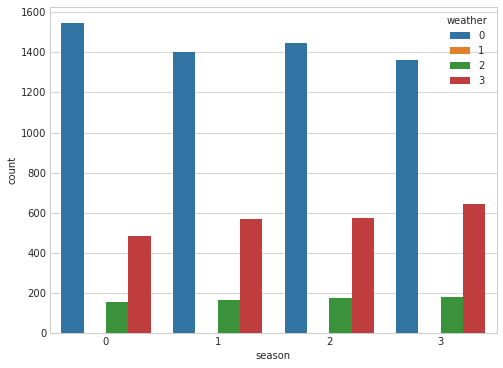

In [70]:
plt.figure(figsize=(8,6))
sns.countplot(x='season',data=data,hue='weather')

In [71]:
#Visualizing trends over the holidays
plt.figure(figsize=(8,6))
sns.countplot(x='season',data=data,hue='holiday')

<AxesSubplot:xlabel='season', ylabel='count'>

<AxesSubplot:>

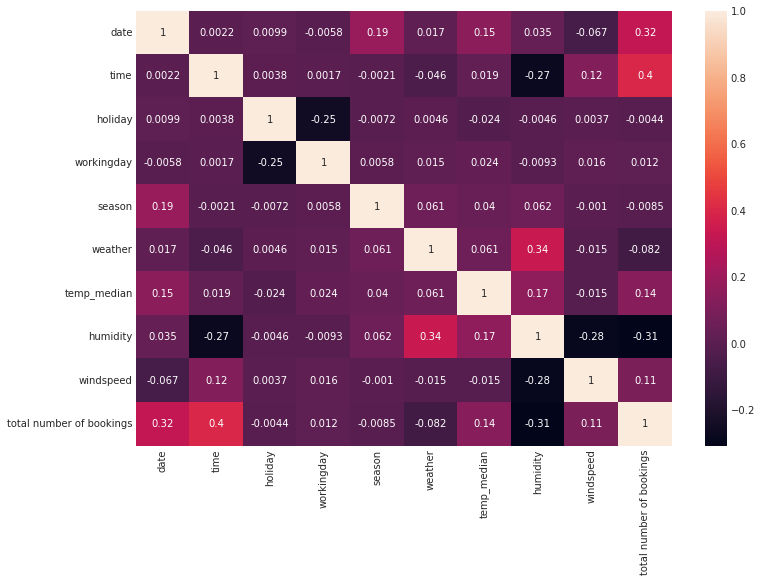

In [72]:
#Checking Multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

No evidence of Multicollinearity on the Dataset

# Task 2 : Machine learning model 

Applying Predictive Modelling

In [73]:
data.columns

Index(['date', 'time', 'holiday', 'workingday', 'season', 'weather',
       'temp_median', 'humidity', 'windspeed', 'total number of bookings'],
      dtype='object')

In [74]:
# Defining features and target
data_X = data.loc[:, data.columns !=  'total number of bookings']
data_y = data['total number of bookings']
data_X.head()

date  time  holiday  workingday  season  weather  temp_median  humidity  \
0   305    19        0           1       2        0       22.140        77   
1   384     4        0           1       0        0       12.998        79   
2    12     9        0           1       1        0        5.740        50   
3   207    16        0           1       3        0       13.940        29   
4   164    13        0           1       0        0       12.998        51   

   windspeed  
0    16.9979  
1    19.0012  
2    22.0028  
3     8.9981  
4    19.0012

In [75]:
data_y.head()

0    504
1      5
2    139
3    209
4    184
Name: total number of bookings, dtype: int64

In [76]:
#Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=0)
X_train.head()

date  time  holiday  workingday  season  weather  temp_median  humidity  \
5428   350     7        0           1       0        2        27.06        83   
4175   266     9        0           1       1        0        18.86        77   
7051   232    19        0           1       1        0        13.94        34   
8678   410    15        0           1       3        0        21.32        42   
1633   409     3        0           1       3        0        17.22        47   

      windspeed  
5428    15.0013  
4175    16.9979  
7051     6.0032  
8678    12.9980  
1633    19.9995

In [77]:
y_train.head()

5428    230
4175    286
7051    265
8678    455
1633      3
Name: total number of bookings, dtype: int64

In [78]:
# Applying Feature Scaling - Using MixmaxScaler function
scaler = preprocessing.MinMaxScaler()
 #Creating new dataframe with the scaled values of each columns  - This will help the non-tree based algorithm's to predict better
data_X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
data_X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
data_X_train_scaled.head()

date      time  holiday  workingday    season   weather  temp_median  \
0  0.769231  0.304348      0.0         1.0  0.000000  0.666667     0.969697   
1  0.584615  0.391304      0.0         1.0  0.333333  0.000000     0.666667   
2  0.509890  0.826087      0.0         1.0  0.333333  0.000000     0.484848   
3  0.901099  0.652174      0.0         1.0  1.000000  0.000000     0.757576   
4  0.898901  0.130435      0.0         1.0  1.000000  0.000000     0.606061   

   humidity  windspeed  
0      0.83   0.535774  
1      0.77   0.607083  
2      0.34   0.214405  
3      0.42   0.464226  
4      0.47   0.714286

In [79]:
## Applying Regular Predictive Modelling on the Dataset to verify the outputs predicted by the LayPredict Regressor
algos = {
    "LinearReg" : LinearRegression(),
    "SGDReg" : SGDRegressor(),
    "KNeighbors" : KNeighborsRegressor(),
     "LinearSVR": LinearSVR(),
    "SVR" : SVR(),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest" : RandomForestRegressor(),
    "GBMReg": GradientBoostingRegressor(),
    "XGBoost" : XGBRegressor(),
    "XGBoostRFReg":XGBRFRegressor(),
    "MLPReg" : MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1, max_iter=10000)
}

In [80]:
%%time
scores, r2_scores, maes, mses = [], [], [], []
#Predicting using test set 
for key, reg in algos.items():
    reg = reg.fit(data_X_train_scaled, y_train)
    y_pred = reg.predict(data_X_test_scaled)
    score = reg.score(data_X_test_scaled,y_test)
    r2_score = metrics.r2_score(y_test, y_pred)
    mae=metrics.mean_absolute_error(y_test, y_pred)
    mse=metrics.mean_squared_error(y_test, y_pred)
    scores.append(score)
    r2_scores.append(r2_score)
    maes.append(mae)
    mses.append(mse)

print(scores)
print(r2_scores)
print(maes)
print(mses)

[0.3065841804761672, 0.30526399581425034, 0.6802420857444723, 0.2371278642933402, 0.24363009284602566, 0.8603081589494296, 0.9254966785406871, 0.8678713439290471, 0.9418019201026656, 0.7377361806156248, 0.5004489103456813]
[0.3065841804761672, 0.30526399581425034, 0.6802420857444723, 0.2371278642933402, 0.24363009284602566, 0.8603081589494296, 0.9254966785406871, 0.8678713439290471, 0.9418019201026656, 0.7377361806156248, 0.5004489103456813]
[110.49228148194875, 109.19216368558183, 64.46291618828933, 105.22159804578548, 101.5761176618153, 37.77841561423651, 28.586389207807116, 43.504471326946366, 27.027514482924264, 59.62772808515656, 94.97684052311676]
[21216.473761503334, 21256.86750859023, 9783.646704936855, 23341.6316658551, 23142.68269815765, 4274.157290470724, 2279.581342652124, 4042.746193181885, 1780.6891627588982, 8024.497402411801, 15284.786253447992]
CPU times: user 22.2 s, sys: 7.55 s, total: 29.7 s
Wall time: 30.5 s


In [81]:
#Creating a Result Dataframe 
results_df = pd.DataFrame(zip(algos.keys(),  scores, mses, r2_scores, maes), columns = ['Regression_Algorithms', 'scores', 'r2_scores', 'mean_abs_error', 'mean_squared_error'])
results_df

Regression_Algorithms    scores     r2_scores  mean_abs_error  \
0              LinearReg  0.306584  21216.473762        0.306584   
1                 SGDReg  0.305264  21256.867509        0.305264   
2             KNeighbors  0.680242   9783.646705        0.680242   
3              LinearSVR  0.237128  23341.631666        0.237128   
4                    SVR  0.243630  23142.682698        0.243630   
5           DecisionTree  0.860308   4274.157290        0.860308   
6           RandomForest  0.925497   2279.581343        0.925497   
7                 GBMReg  0.867871   4042.746193        0.867871   
8                XGBoost  0.941802   1780.689163        0.941802   
9           XGBoostRFReg  0.737736   8024.497402        0.737736   
10                MLPReg  0.500449  15284.786253        0.500449   

    mean_squared_error  
0           110.492281  
1           109.192164  
2            64.462916  
3           105.221598  
4           101.576118  
5            37.778416  
6            28.586389  
7            43.504471  
8            27.027514  
9            59.627728  
10           94.976841

In [82]:
# Insights: XGBoost and RFC gives the lowest mean squared error. These algorithms will be used for HyperParameter tuning.

In [83]:
# Building Individual Algorithms to gain insights on the model pred

In [84]:
## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(data_X_train_scaled,y_train)
#Prediction using test set 
y_pred = lin_reg.predict(data_X_test_scaled)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Linear Reg Accuracy: ', lin_reg.score(data_X_test_scaled,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Linear Reg Accuracy:  0.3065841804761672
R2 square: 0.3065841804761672
MAE:  110.49228148194875
MSE:  21216.473761503334


In [85]:
# SVR
reg= SVR(kernel='rbf')
reg.fit(data_X_train_scaled,y_train)
y_pred=reg.predict(data_X_test_scaled)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('SVR Accuracy: ', reg.score(data_X_test_scaled,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

SVR Accuracy:  0.24363009284602566
R2 square: 0.24363009284602566
MAE:  101.5761176618153
MSE:  23142.68269815765


In [86]:
# Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(data_X_train_scaled,y_train)
y_pred = dt_reg.predict(data_X_test_scaled)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('Decision Tree Accuracy: ', dt_reg.score(data_X_test_scaled,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

Decision Tree Accuracy:  0.87173193827435
R2 square: 0.87173193827435
MAE:  37.0849598163031
MSE:  3924.6234213547646


In [87]:
# RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 500 ,  random_state = 0)
rf_reg.fit(data_X_train_scaled,y_train)
y_pred = rf_reg.predict(data_X_test_scaled)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('RF Accuracy: ', rf_reg.score(data_X_test_scaled,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

RF Accuracy:  0.9260559533277606
R2 square: 0.9260559533277606
MAE:  28.580614236509756
MSE:  2262.4691878507465


In [88]:
# XGBoost
xgb_reg= XGBRegressor()
xgb_reg.fit(data_X_train_scaled,y_train)
y_pred=xgb_reg.predict(data_X_test_scaled)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('XGB Accuracy: ', reg.score(data_X_test_scaled,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

XGB Accuracy:  0.24363009284602566
R2 square: 0.9418019201026656
MAE:  27.027514482924264
MSE:  1780.6891627588982


In [89]:
# AdaBoostRegressor
ada_reg= AdaBoostRegressor()
ada_reg.fit(data_X_train_scaled,y_train)
y_pred=ada_reg.predict(data_X_test_scaled)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('ADABoost Accuracy: ', reg.score(data_X_test_scaled,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

ADABoost Accuracy:  0.24363009284602566
R2 square: 0.6484418856440981
MAE:  83.18740320445846
MSE:  10756.638800074592


In [90]:
# Applying Crossvalidation and HyperParameter Tunings

In [91]:
# Applying StandardScalar
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
X_train = std_scalar.fit_transform(X_train)
X_test = std_scalar.transform(X_test)

In [92]:
# Parameter grid for RFC 
rfc_param_grid = { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
     'max_depth' : [4,5]
}

In [93]:
abc

NameError: name 'abc' is not defined

In [94]:
from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
rf_rand = RandomForestRegressor()
rf_rand = RandomizedSearchCV(estimator = rf_rand, param_distributions = rfc_param_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...max_depth=5, max_features=log2, n_estimators=200; total time=   0.6s
[CV] END ...max_depth=5, max_features=log2, n_estimators=200; total time=   0.6s
[CV] END ...max_depth=5, max_features=log2, n_estimators=200; total time=   0.6s
[CV] END ...max_depth=5, max_features=log2, n_estimators=200; total time=   0.6s
[CV] END ...max_depth=5, max_features=log2, n_estimators=200; total time=   0.6s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=300; total time=   0.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=300; total time=   0.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=300; total time=   0.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=300; total time=   0.9s
[CV] END ...max_depth=5, max_features=sqrt, n_estimators=300; total time=   0.9s
[CV] END ...max_depth=4, max_features=auto, n_estimators=200; total time=   1.0s
[CV] END ...max_depth=4, max_features=auto, n_es

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [4, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [95]:
# Printing metrics for RFC with RandomizedSearchCV
print(rf_rand.best_params_)
print(rf_rand.best_score_)
print(rf_rand.best_estimator_)

{'n_estimators': 300, 'max_features': 'auto', 'max_depth': 5}
-10813.648591397732
RandomForestRegressor(max_depth=5, n_estimators=300)


In [96]:
# Generating RFC model with the best params
# Best prarams are : 
#{'n_estimators': 300, 'max_features': 'auto', 'max_depth': 5}

# RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=5, n_estimators=300)
rf_reg.fit(X_train,y_train)
y_pred = rf_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('RF Accuracy: ', rf_reg.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

RF Accuracy:  0.6549628906860337
R2 square: 0.6549628906860337
MAE:  67.41635675119633
MSE:  10557.11532732506


In [97]:
# Parameter grid for XGB
praam= {
    'n_estimators': [400],
    'colsample_bytree': [0.7],
    'max_depth': [15],
    'reg_alpha': [1.1],
    'reg_lambda': [1.1],
    'subsample': [0.7,0.8]
}

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
# Use the random grid to search for best hyperparameters
xgb_rand = XGBRegressor()
xgb_rand = GridSearchCV(estimator = xgb_rand, param_grid= praam,scoring='neg_mean_squared_error', cv = 5, verbose=2,  n_jobs = 1)
xgb_rand.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  40.5s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  31.1s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  31.1s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  38.8s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7; total time=  30.9s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.8; total time=  30.4s
[CV] END colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.8; total time=  30.5s
[CV] END colsample_bytree=0.7, max_depth=15,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [100]:
# Printing metrics for XGB with GridSearchCV
print(xgb_rand.best_params_)
print(xgb_rand.best_score_)
print(xgb_rand.best_estimator_)

{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.7}
-6177.342836021975
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=15, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1.1, reg_lambda=1.1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [101]:
# Generating XGBoost model with the best params
# Best prarams are : 
#{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.7}

# XGBoost
xgb_reg= XGBRegressor(colsample_bytree= 0.7, max_depth= 15, n_estimators= 400, reg_alpha= 1.1, reg_lambda= 1.1, subsample= 0.7)
xgb_reg.fit(X_train,y_train)
y_pred=xgb_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
# Printing the metrics
print('XGB Accuracy: ', reg.score(X_test,y_test))
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)

XGB Accuracy:  -0.1729097238428745
R2 square: 0.9123039101942696
MAE:  35.386467496614294
MSE:  2683.2410452178488


# Conclusions:
    1. XGBoostRegressor and RandomForestRegressor performs better on the given dataset.
    
# Future Operations:
    1. Imbalanced dataset can be treated/optimized.
    2. Random grids can be utilized effectively. In this analysis, reduced the parameters grid due to less computation time.